In [23]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras as keras
print(keras.__version__)
import matplotlib.pyplot as plt

1.13.1
2.2.4-tf


In [13]:
dataset = tf.keras.datasets.mnist
print(type(dataset))

<class 'module'>


In [16]:
(trainx,trainy),(testx,testy) = dataset.load_data()

In [18]:
print((trainx,trainy))

(array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...,

In [37]:
print(trainx[0].shape)


(28, 28)


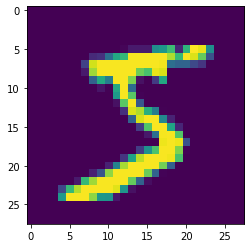

In [36]:
for i in range(1):
    plt.imshow(trainx[i])
    plt.show()

In [35]:
print(trainx[0].shape)

(28, 28)


In [59]:
#noramalizing the pixels: input data
train_nx = tf.keras.utils.normalize(trainx)
train_ny = tf.keras.utils.normalize(trainy)
test_nx = tf.keras.utils.normalize(testx)
test_ny = tf.keras.utils.normalize(testy)
print(train_nx[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

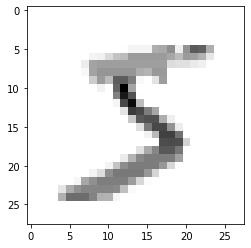

In [34]:
#show normalized pic
plt.imshow(train_nx[0],cmap = plt.cm.binary)
plt.show()

In [54]:
#model preparation
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
# print(type(model))
# print(model)

# Next, we want our hidden layers. We're going to go with the simplest neural network layer,
# which is just a Dense layer. This refers to the fact that it's a densely-connected layer,
# meaning it's "fully connected," where each node connects to each prior and subsequent node. 

# HIDDEN LAYER NO1
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))  ##setting a layer(called hidden layer) with 128 
# activation units and each activation function here is relu
# The Rectified Linear Unit is the most commonly used activation function in deep learning models.
# The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back.
# So it can be written as  f(x)=max(0,x) .

# HIDDEN LAYER NO2
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

# # HIDDEN LAYER NO3
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(train_nx,trainy,epochs = 6)

Epoch 1/6
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0429 - acc: 0.9855
Epoch 2/6
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0336 - acc: 0.9890
Epoch 3/6
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0273 - acc: 0.9911
Epoch 4/6
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0236 - acc: 0.9919
Epoch 5/6
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0196 - acc: 0.9937
Epoch 6/6
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0183 - acc: 0.9937


In [62]:
model.evaluate(test_nx,testy)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0906 - acc: 0.9792


[0.0905639864344681, 0.9792]